<a href="https://colab.research.google.com/github/IFibla/Aprenentatge-Automatic/blob/master/Problema%201/Individual-%C2%BFKullback-que%3F/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Kullback que?

Cuando trabajamos con modelos que representan una distribución de probabilidad nuestro objetivo es hacer que la distribución de los datos se acerque lo más posible a las probabilidades que nos da el modelo sobre esos datos. Existen muchas maneras de calcular esa diferencia, una común es usar funciones de divergencia, entre ellas la divergencia de Kullback-Leibler es la más usada. Dadas dos distribuciones de probabilidad 𝑃 y 𝑄 se define asumiendo que sean distribuciones discretas como:

$$
KL(P|Q)=\sum_{i=1}^{N}P(i)\cdot \log(\frac{P(i)}{Q(i)}) 
$$

En el caso de distribuciones continuas, simplemente substituimos el sumatorio por una integral.



In [1]:
%load_ext autoreload
%autoreload 2

!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.5 MB/s 


In [2]:
from jax import grad, jit
from sklearn.datasets import make_classification
import jax.numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
RANDOM_STATE = 1

## Utils

In [17]:
def generate_matplotlib_histogram(X, labelX, labelY, rangeX, rangeY, title):
  plt.hist(X, bins=30, alpha=1, range=rangeX, density=True, stacked=True)  
  plt.xlabel(labelX)
  plt.ylabel(labelY)
  plt.title(title)
  plt.ylim((rangeY[0], rangeY[1]))
  plt.legend([len(x) for x in X] if len(X) > 1 else "X")
  plt.show()

> Todo modelo de clasificación es una distribución de probabilidad sobre un conjunto de valores discretos, por lo que podemos ajustar un modelo probabilístico para clasificación haciendo que las probabilidades que obtenga para una muestra se ajusten a las de los datos. Usa la función make_classification de scikit-learn para crear un conjunto de datos de clasificación de dos dimensiones y 100 ejemplos. Tendrás dar un valor 0 al parámetro n_redundant y un valor 1 al parámetro n_clusters_per_class. Da un valor también al parámetro random_state para que los experimentos sean reproducibles. El problema que generará será de clasificación binaria.

[Documentation to make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)


In [58]:
sample = make_classification(n_samples=2, n_features=100, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=RANDOM_STATE)
np_vals = [np.array(val) for val in sample[0]]

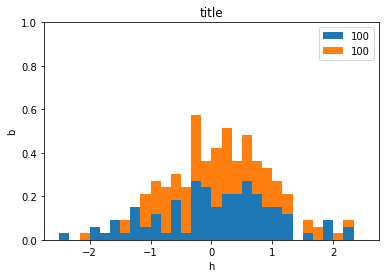

In [57]:
generate_matplotlib_histogram(np_vals , "h", "b", [-2.5, 2.5], [0,1], "title")